In [104]:
import requests 
import matplotlib.pyplot as plt
import pandas as pd
import json
from pandas import json_normalize 
from pandas.io.json import json_normalize

In [105]:
company = "NVDA"
years = 5

In [106]:
api_key = '27ae1dd809036202bcf78ee64609eb76'

In [107]:
r = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}')

data = r.json()

data

[{'date': '2021-01-31',
  'symbol': 'NVDA',
  'reportedCurrency': 'USD',
  'fillingDate': '2021-02-26',
  'acceptedDate': '2021-02-26 17:03:14',
  'period': 'FY',
  'revenue': 16675000000,
  'costOfRevenue': 6279000000,
  'grossProfit': 10396000000,
  'grossProfitRatio': 0.623448275862069,
  'researchAndDevelopmentExpenses': 3924000000,
  'generalAndAdministrativeExpenses': 0.0,
  'sellingAndMarketingExpenses': 0.0,
  'sellingGeneralAndAdministrativeExpenses': 1940000000,
  'otherExpenses': 4000000.0,
  'operatingExpenses': 5864000000,
  'costAndExpenses': 12143000000,
  'interestExpense': 184000000,
  'depreciationAndAmortization': 1098000000,
  'ebitda': 5630000000,
  'ebitdaratio': 0.3376311844077961,
  'operatingIncome': 4532000000,
  'operatingIncomeRatio': 0.271784107946027,
  'totalOtherIncomeExpensesNet': 4000000.0,
  'incomeBeforeTax': 4409000000,
  'incomeBeforeTaxRatio': 0.26440779610194903,
  'incomeTaxExpense': 77000000,
  'netIncome': 4332000000,
  'netIncomeRatio': 0.259

In [108]:
date = []
symbol = []
revenue = []
costOfRevenue = []
netIncome = []

     
for finance in data:
    date.append(finance["date"])
    symbol.append(finance["symbol"])
    revenue.append(finance["revenue"])
    costOfRevenue.append(finance["costOfRevenue"])
    netIncome.append(finance["netIncome"])

      
finance_dict = {
    "Date" : date,
    "Ticket": symbol,
    "Revenue" : revenue,
    "CostOfRevenue" : costOfRevenue,
    "NetIncome" : netIncome
}

In [109]:
finance_dict

{'Date': ['2021-01-31',
  '2020-01-26',
  '2019-01-27',
  '2018-01-28',
  '2017-01-29'],
 'Ticket': ['NVDA', 'NVDA', 'NVDA', 'NVDA', 'NVDA'],
 'Revenue': [16675000000, 10918000000, 11716000000, 9714000000, 6910000000],
 'CostOfRevenue': [6279000000, 4150000000, 4545000000, 3892000000, 2847000000],
 'NetIncome': [4332000000, 2796000000, 4141000000, 3047000000, 1666000000]}

In [110]:
finance_df = pd.DataFrame(finance_dict, columns = ['Date', 'Ticket', 'Revenue', 'CostOfRevenue', 'NetIncome'])

In [111]:
finance_df

,Date,Ticket,Revenue,CostOfRevenue,NetIncome
0,2021-01-31,NVDA,16675000000,6279000000,4332000000
1,2020-01-26,NVDA,10918000000,4150000000,2796000000
2,2019-01-27,NVDA,11716000000,4545000000,4141000000
3,2018-01-28,NVDA,9714000000,3892000000,3047000000
4,2017-01-29,NVDA,6910000000,2847000000,1666000000


In [112]:
finance_df = finance_df.sort_values(by=['Date'])

In [113]:
print(finance_df.dtypes)

Date             object
Ticket           object
Revenue           int64
CostOfRevenue     int64
NetIncome         int64
dtype: object


In [121]:
finance_df

,Date,Ticket,Revenue,CostOfRevenue,NetIncome
4,2017-01-29,NVDA,6910000000,2847000000,1666000000
3,2018-01-28,NVDA,9714000000,3892000000,3047000000
2,2019-01-27,NVDA,11716000000,4545000000,4141000000
1,2020-01-26,NVDA,10918000000,4150000000,2796000000
0,2021-01-31,NVDA,16675000000,6279000000,4332000000


In [122]:
finance_df["Revenue"] = finance_df['Revenue'].div(1000000000)

In [123]:
finance_df

,Date,Ticket,Revenue,CostOfRevenue,NetIncome
4,2017-01-29,NVDA,6.91,2847000000,1666000000
3,2018-01-28,NVDA,9.714,3892000000,3047000000
2,2019-01-27,NVDA,11.716,4545000000,4141000000
1,2020-01-26,NVDA,10.918,4150000000,2796000000
0,2021-01-31,NVDA,16.675,6279000000,4332000000


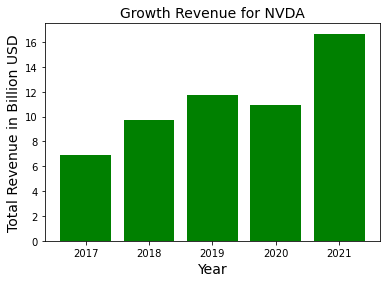

In [124]:
plt.bar(finance_df['Date'], finance_df['Revenue'], color='green')
plt.title('Growth Revenue for NVDA', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue in Billion USD', fontsize=14)
plt.xticks(financedf['Date'],['2017', '2018', '2019', '2020', '2021'])
plt.show()